# 의사결정 나무
- 데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘

서울 지역(구)의 경도와 위도를 사용하여 임의로 입력된 지역(동) 강동, 강서, 강남 강북으로 분류해보는 예제이다.

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("../data/seoul_district.csv")
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [3]:
test_df = pd.read_csv("../data/seoul_dong.csv")
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [7]:
# train_df의 label의 갯수 확인

train_df.label.value_counts()

label
강서    5
강남    5
강북    5
강동    5
Name: count, dtype: int64

In [8]:
test_df.label.value_counts()

label
강서    5
강남    5
강북    5
강동    5
Name: count, dtype: int64

In [9]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns

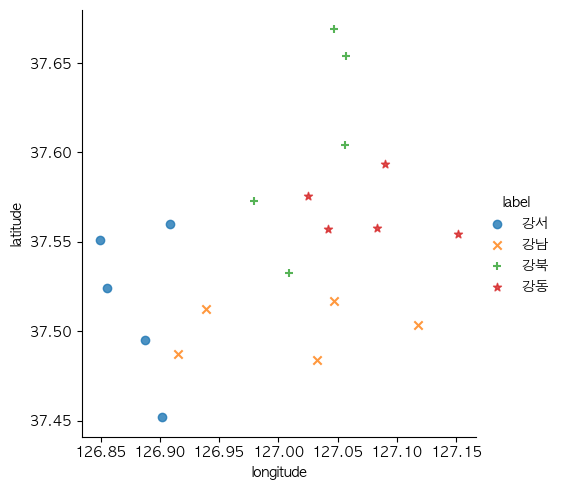

In [13]:
# 경도, 위도에 따른 데이터 시각화

sns.lmplot(
    x='longitude',
    y='latitude',
    data=train_df,
    fit_reg=False,
    hue='label',
    markers=['o', 'x', '+', '*'],
)

plt.show()

### 데이터 다듬기
- 학습 및 테스트에 필요없는 feature를 데이터에서 제거
- 구 이름 및 동 이름은 학습 및 테스트에 필요없으므로 제거



In [17]:
train_df_droped =  train_df.iloc[:, 1:]
train_df_droped

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서
5,126.915065,37.487517,강남
6,126.939300,37.512400,강남
7,127.032400,37.483700,강남
8,127.047300,37.517200,강남
9,127.117898,37.503510,강남


In [20]:
test_df_dropped = test_df.iloc[:, 1:]
test_df_dropped

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서
5,127.030720,37.508838,강남
6,127.057193,37.501163,강남
7,127.018281,37.486401,강남
8,126.988194,37.483279,강남
9,127.043159,37.492896,강남


In [22]:
X_train = train_df_droped.iloc[:, :2]
y_train = train_df_droped.iloc[:, 2]

X_test = test_df_dropped.iloc[:, :2]
y_test = test_df_dropped.iloc[:, 2]



## 학습 시키기

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

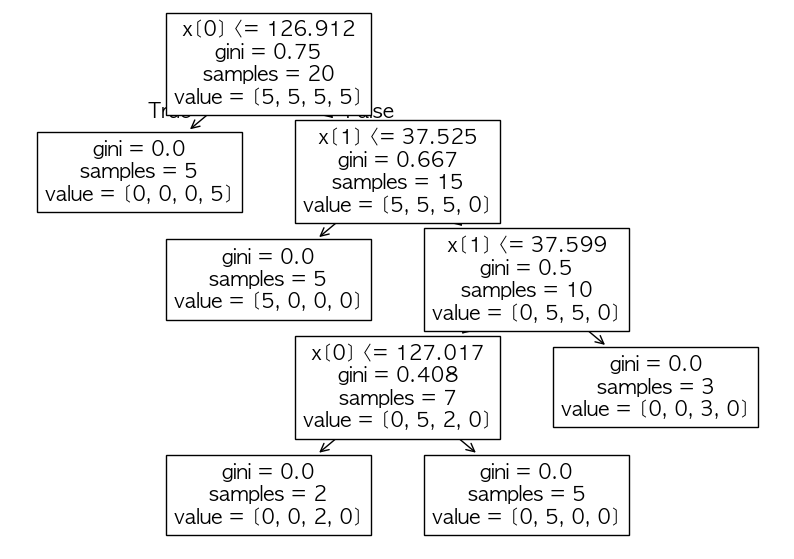

In [29]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 7))

plot_tree(clf)
plt.show()

In [30]:
clf.score(X_test, y_test)

1.0